In [29]:
#!ls *.pickle
import pickle
import sys
import os
from pathlib import Path
p = !pwd
home = p[0].replace('/notebook','')
sys.path.insert(0, os.path.join(home,'src','model'))
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import platform
import struct
import numpy as np
import numpy
import random
import tensorflow as tf
import os
import pickle as pickle
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import time
from pathlib import Path
%matplotlib inline
import matplotlib.ticker as ticker
from bpr_model import *

home
results_directory = os.path.join(home, 'data', 'results')

price_features = ['BPR', 'Price-Ratio-26bin', 'Standard-Price-Log-10bin', 
 'L4-Avg-Log-10bin', 'Price-Ratio-Log-12bin', 'Standard-Price-20bin', 'L4-Avg-20bin']
cat_features =  ['BPR','Category-Tags', 'Subcat-L4', 'Brand', 'Standard-Price-20bin']
w_combo_features = ['Category-Tags, Subcat-L4', 'Category-Tags, Subcat-L4, Brand']
e_combo_features = ['Brand, L4-Avg-20bin', 'Brand, L4-Avg-20bin, Standard-Price-Log-10bin']
w_combo = ['BPR','Category-Tags','Subcat-L4'] + w_combo_features

# Women's Clothing, Shoes and Jewerly
## K=20, Min Item=4, Min Users=0

## Single Features

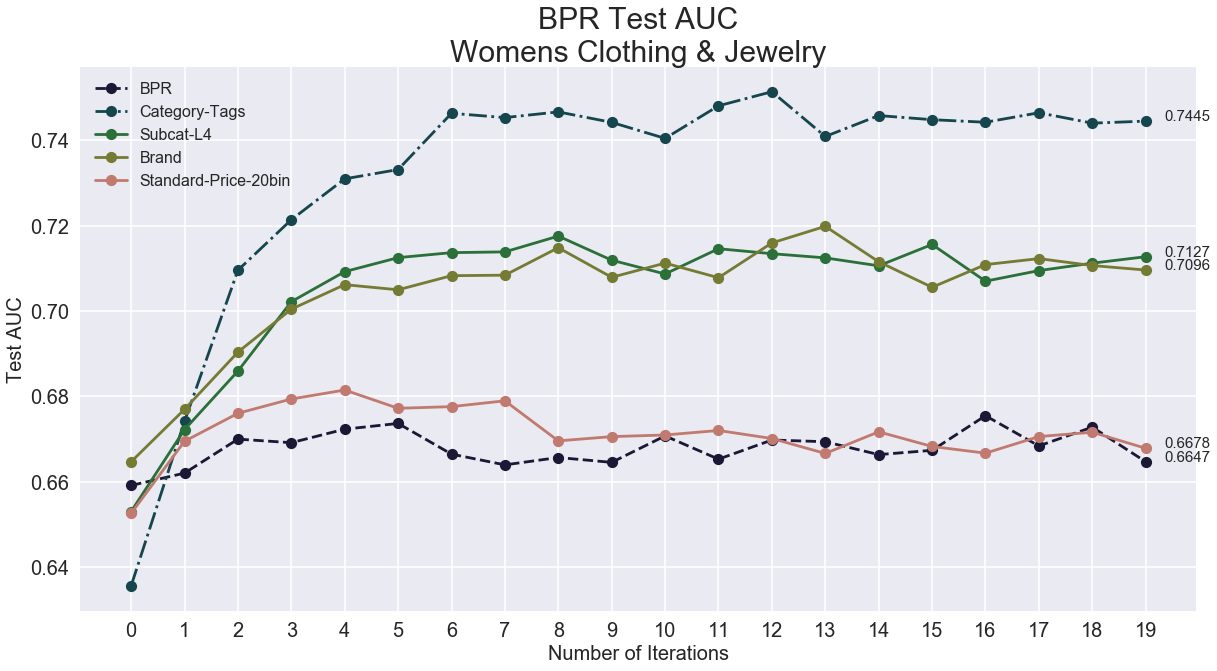

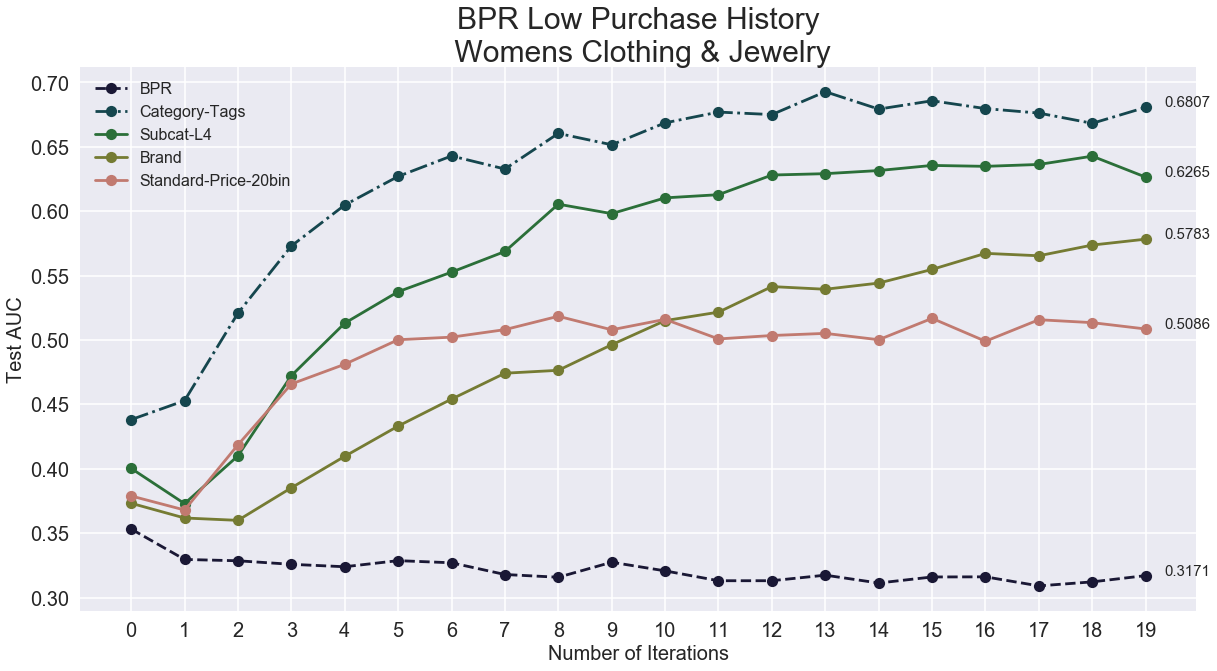

In [30]:
results_file = os.path.join(home, 'data', 'results', 
                             'clothing_k20_minitems4_minusers0_results.singlefeatures.20180603.2304.pickle')
results_sf = pickle.load( open( results_file, "rb" ) )
results_file = os.path.join(home, 'data', 'results', 
                             'clothingcombo_k20_minitems4_minusers0_results.combinations.20180605.0457.pickle')
results_combo = pickle.load( open( results_file, "rb" ) )
results = dict(list(results_sf.items()) + list(results_combo.items()))


results_to_graph ={v:results[v] for v in cat_features}
plot_auc_curve(results_to_graph,
               'BPR Test AUC\nWomen''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History\n Women''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')

## Price Features

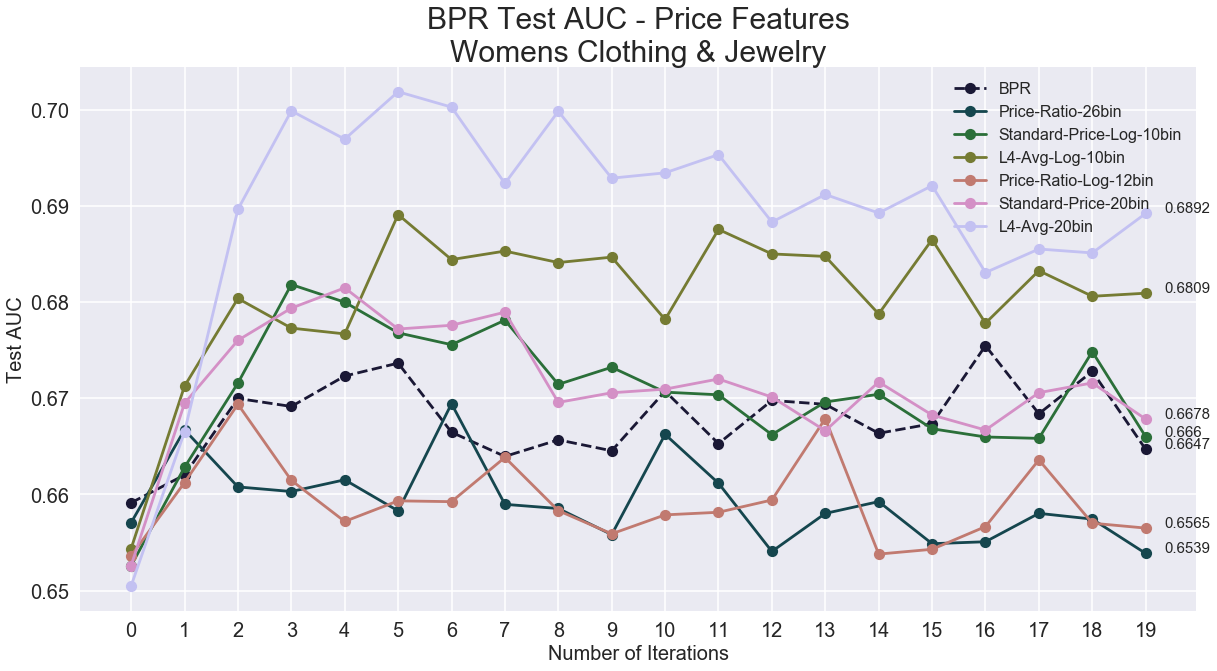

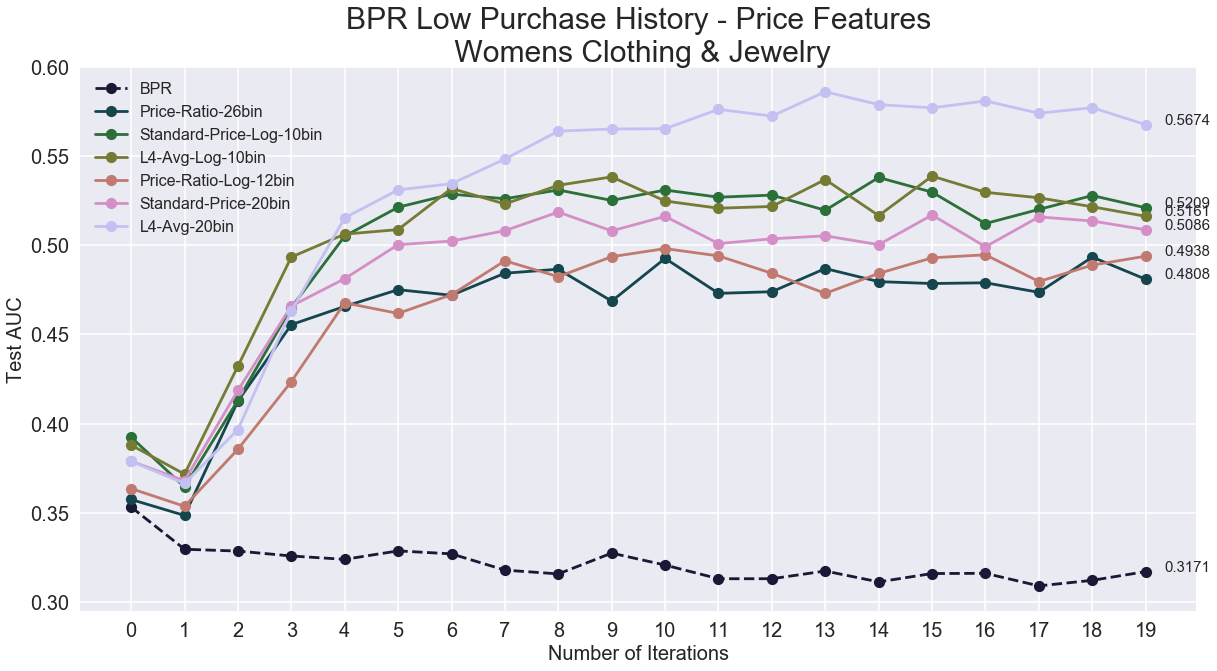

In [31]:
results_to_graph ={v:results[v] for v in (price_features) } # + ['Category-Tags'])}
plot_auc_curve(results_to_graph,
               'BPR Test AUC - Price Features\nWomen''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History - Price Features\n Women''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')

## Combinations

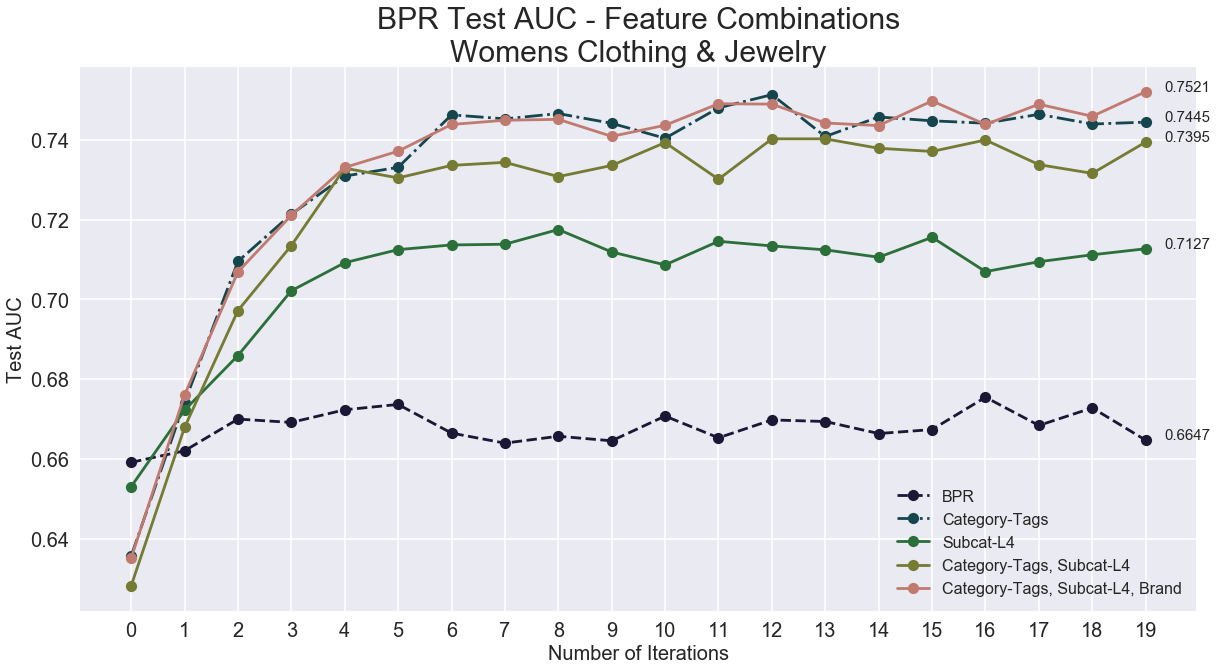

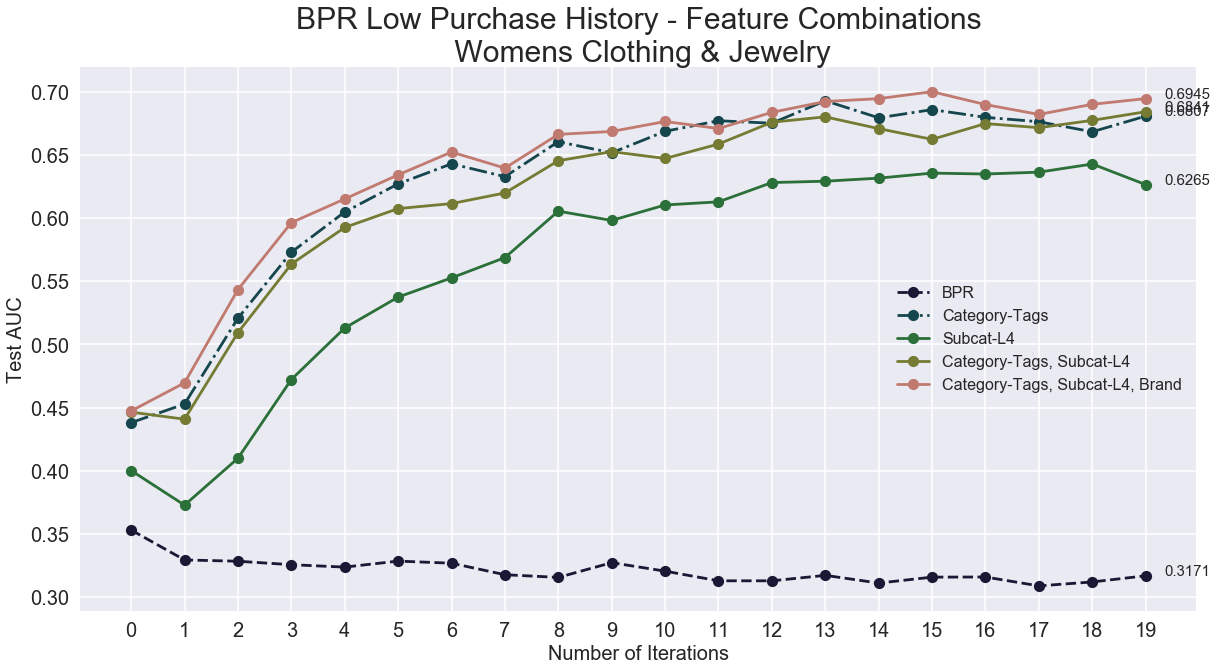

In [32]:
results_to_graph ={v:results[v] for v in w_combo}
plot_auc_curve(results_to_graph,
               'BPR Test AUC - Feature Combinations\nWomen''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History - Feature Combinations\n Women''s Clothing & Jewelry', #\n(K=20,Min Items 4, Min Users 0)',
               'Category-Tags')









# Electronic (Computer's Accessories)
## K=20, Min Item=4, Min Users=0

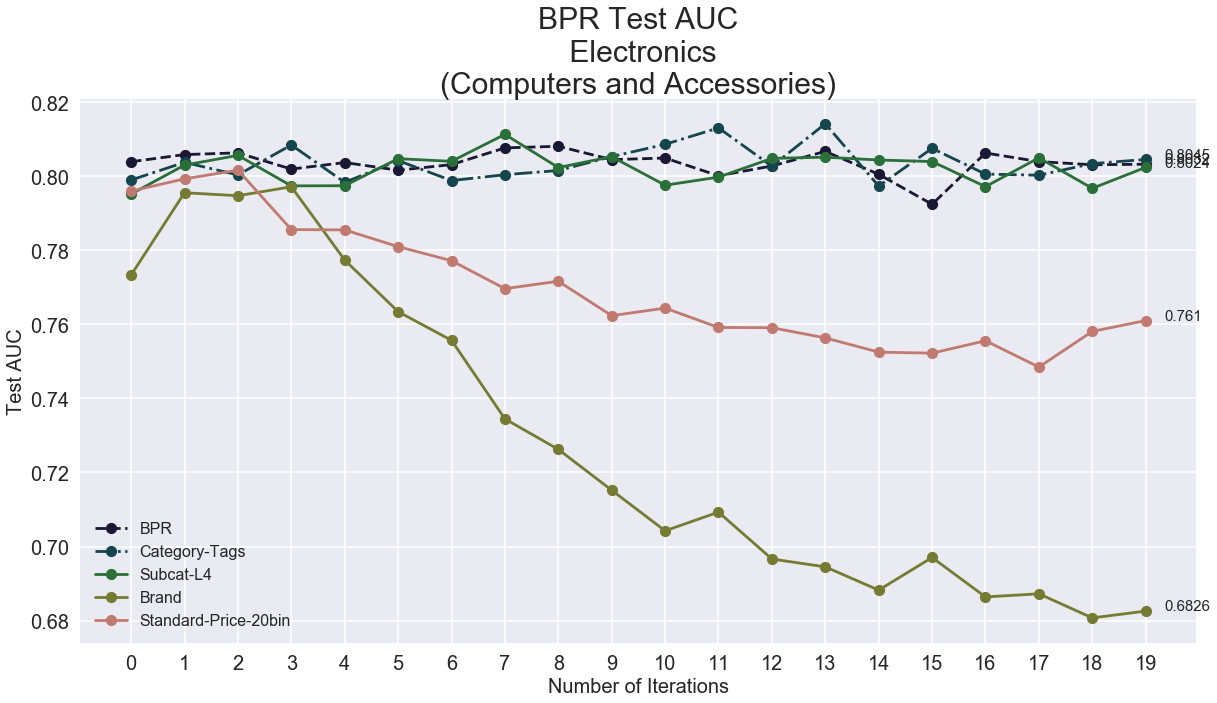

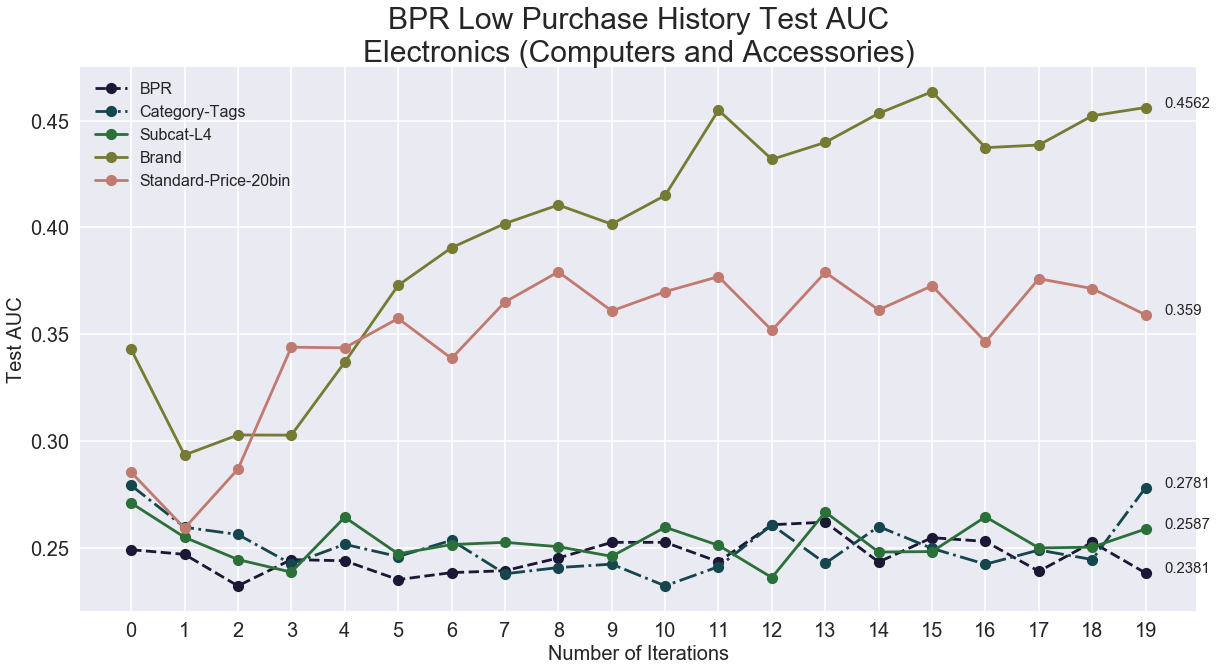

In [36]:
results_file = os.path.join(home, 'data', 'results', 
                             'electronic_k20_minitems4_minusers0_results.singlefeatures.20180604.1926.pickle')
results_sf = pickle.load( open( results_file, "rb" ) )
results_file = os.path.join(home, 'data', 'results', 
                             'electroniccombos_k20_minitems4_minusers0_results.combinations.20180605.1719.pickle')
results_combo = pickle.load( open( results_file, "rb" ) )
results_to_graph ={v:results[v] for v in cat_features if v in results.keys()}

results = dict(list(results_sf.items()) + list(results_combo.items()))

plot_auc_curve(results_to_graph,
               'BPR Test AUC\n Electronics\n(Computers and Accessories)', #\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History Test AUC\nElectronics (Computers and Accessories)', #\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')

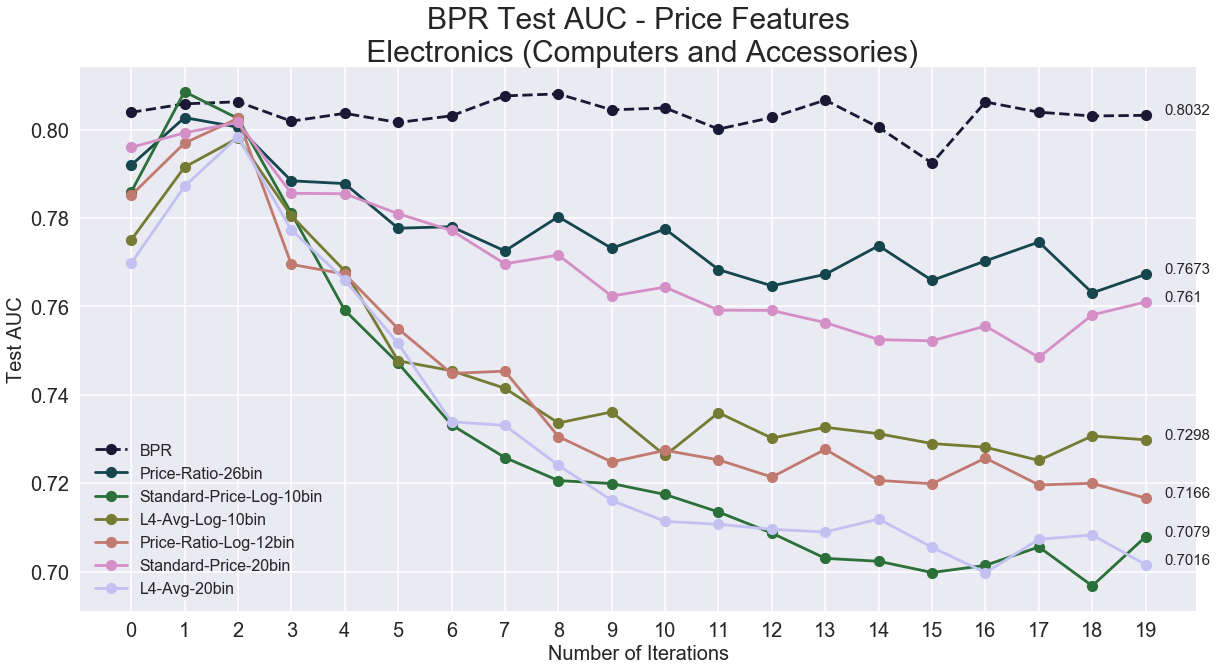

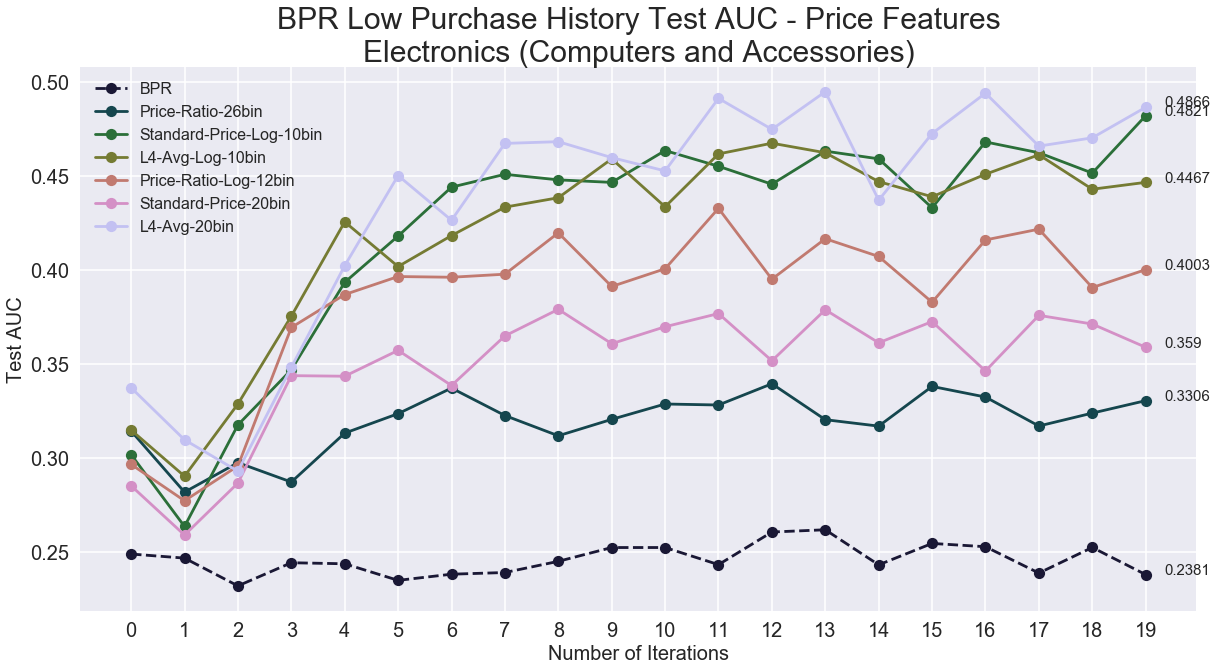

In [34]:
results_to_graph ={v:results[v] for v in price_features if v in results.keys()}

plot_auc_curve(results_to_graph,
               'BPR Test AUC - Price Features\n Electronics (Computers and Accessories)', #\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History Test AUC - Price Features\nElectronics (Computers and Accessories)', #\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')

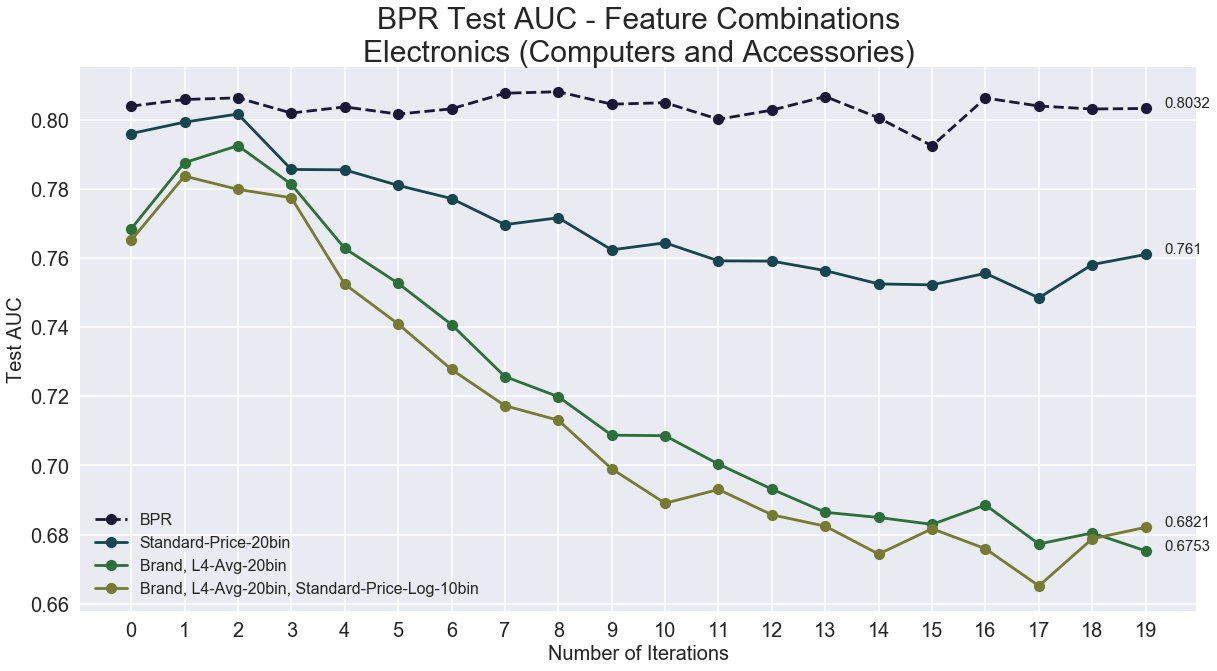

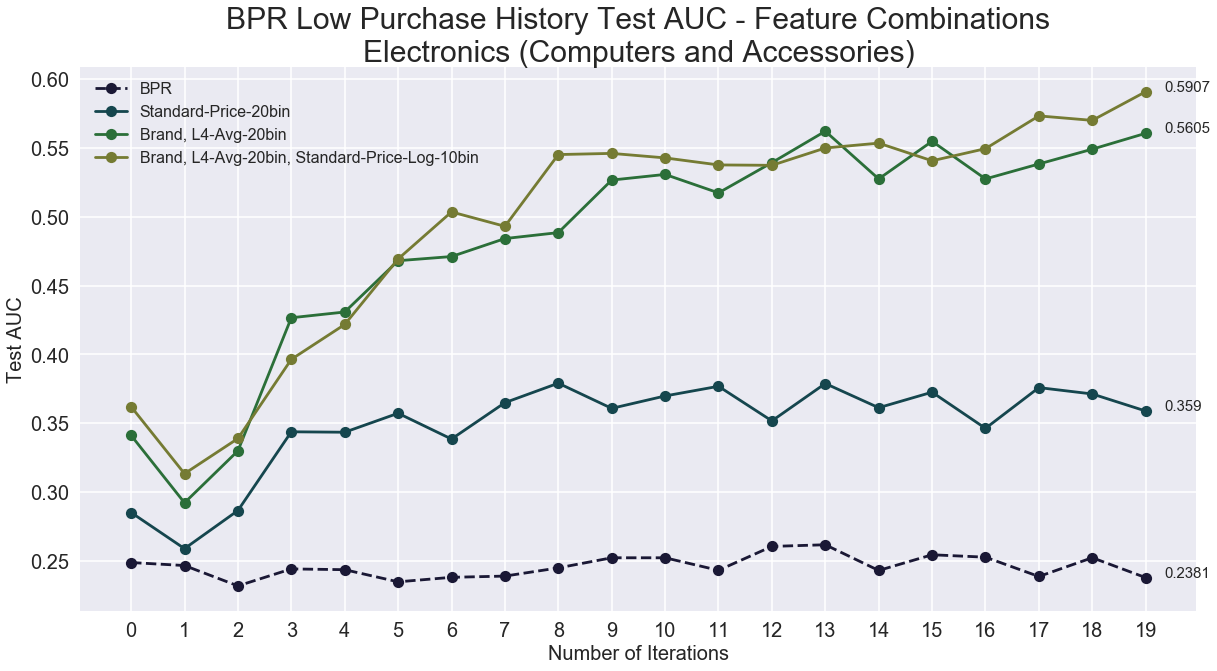

In [35]:
results_to_graph ={v:results[v] for v in (['BPR','Standard-Price-20bin'] +e_combo_features) if v in results.keys()}

plot_auc_curve(results_to_graph,
               'BPR Test AUC - Feature Combinations\nElectronics (Computers and Accessories)', #\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')
plot_auc_cold_start_curve(results_to_graph,
               'BPR Low Purchase History Test AUC - Feature Combinations\nElectronics (Computers and Accessories)',#\n(K=20,Min Items=4, Min Users=0)',
               'Category-Tags')

In [ ]:
performance = [v['delta_sec']/60.0 for k,v in results.items()]

processor = results['BPR']['platform.processor']
k = results['BPR']['num_sessions']

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = results.keys()
y_pos = np.arange(len(objects))

print (type(performance))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('min')
plt.title('Performance on ' + processor)
 
plt.show()

## Performance results will be
## K=20 Clothing on p3.2large
## K=20 Clothing on p3.8xlarge
## K=20 Electronic (Computers and Accessories) p3.8xlarge

In [25]:
results.keys()

dict_keys(['BPR', 'Category-Tags', 'Subcat-L4', 'Brand', 'Price-Ratio-26bin', 'Price-Ratio-Log-12bin', 'Standard-Price-20bin', 'Standard-Price-Log-10bin', 'L4-Avg-20bin', 'L4-Avg-Log-10bin', 'Brand, L4-Avg-20bin', 'Brand, L4-Avg-20bin, Standard-Price-Log-10bin'])

In [26]:
e_combo_features

[]